In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Classified Data")

In [4]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.tail()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS',axis = 1))

In [12]:
scaled_feature    #since its a numpy we hav to convert it to pandas...

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [13]:
df_new = pd.DataFrame(scaled_feature,columns = df.columns[:-1])     #here we convert the numpy to pandas then the df.column will give the error so we apply the [:-1] 

In [14]:
df_new.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_new, df['TARGET CLASS'], test_size=0.3, random_state=100)

In [24]:
from sklearn.neighbors import KNeighborsClassifier    #it classifies the "k" no. of neighbours...

In [41]:
knn5=KNeighborsClassifier(n_neighbors=5)   #for kn=5....

In [42]:
knn5.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
pred5 = knn.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

[[153   9]
 [  9 129]]


In [45]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       162
          1       0.93      0.93      0.93       138

avg / total       0.94      0.94      0.94       300



In [50]:
knn4=KNeighborsClassifier(n_neighbors=4)   #for kn=4....

In [58]:
knn4.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [59]:
pred4 = knn4.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred4))

[[159   3]
 [ 12 126]]


In [64]:
print(classification_report(y_test,pred4))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95       162
          1       0.98      0.91      0.94       138

avg / total       0.95      0.95      0.95       300



In [65]:
knn3=KNeighborsClassifier(n_neighbors=3)    #for kn=3.....

In [66]:
knn3.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [67]:
pred3 = knn3.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred3))

[[155   7]
 [  8 130]]


In [69]:
print(classification_report(y_test,pred3))

             precision    recall  f1-score   support

          0       0.95      0.96      0.95       162
          1       0.95      0.94      0.95       138

avg / total       0.95      0.95      0.95       300



In [70]:
knn2=KNeighborsClassifier(n_neighbors=2)    #for kn=2.....

In [71]:
knn2.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [72]:
pred2 = knn2.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred2))

[[162   0]
 [ 20 118]]


In [74]:
print(classification_report(y_test,pred2))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94       162
          1       1.00      0.86      0.92       138

avg / total       0.94      0.93      0.93       300



In [75]:
knn1=KNeighborsClassifier(n_neighbors=1)    #for kn=1.....

In [76]:
knn1.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [77]:
pred1 = knn1.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred1))

[[162   0]
 [  0 138]]


In [79]:
print(classification_report(y_test,pred1))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       162
          1       1.00      1.00      1.00       138

avg / total       1.00      1.00      1.00       300



In [80]:
print(pred1)    #this is the predicted matrix which will be comapred with the actual data...

[0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1
 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0
 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1
 0 1 0 1]


In [86]:
error_rate = []       #logic to clculate the error rate

for i in range (1,40):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [87]:
print(error_rate)

[0.07666666666666666, 0.06333333333333334, 0.08666666666666667, 0.07, 0.08, 0.07, 0.08333333333333333, 0.07333333333333333, 0.07, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06666666666666667, 0.07, 0.07, 0.07, 0.06666666666666667, 0.06333333333333334, 0.06, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06666666666666667, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.07333333333333333]


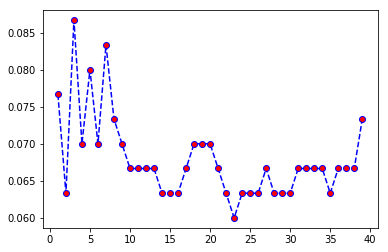

In [90]:
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor="red")


In [91]:
knn15=KNeighborsClassifier(n_neighbors=15)    #for kn=15.....

In [92]:
knn15.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [93]:
pred15 = knn15.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred15))

[[153   9]
 [  8 130]]


In [95]:
print(classification_report(y_test,pred15))

             precision    recall  f1-score   support

          0       0.95      0.94      0.95       162
          1       0.94      0.94      0.94       138

avg / total       0.94      0.94      0.94       300

